In [1]:
%matplotlib inline

---

### Quick tip on importing libraries

You can importing libraries with simpler aliases in Python

In [149]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

The two-letter abbreviations are called aliases. Now you can do this:

In [150]:
a = np.array([1,2,3])  # Alias-dot-function_name
b = np.mean(a)

In [151]:
ss.uniform(0,1).rvs(5) # Alias-dot-function_name

array([ 0.96070772,  0.95321602,  0.01415929,  0.30346224,  0.38548015])

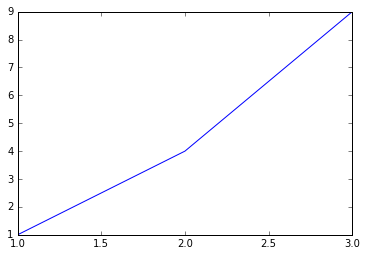

In [152]:
plt.plot([1,2,3], [1, 4, 9])

---

# <center> Lesson 8 - Three ways to get p-values </center>

Given $X_1, \cdots, X_n \sim Bernoulli(p)$, we want to test:

$$H_0: p = \frac{1}{2} \text{ (null hypothesis)}$$ 

$$H_1: p \neq \frac{1}{2} \text{ (alternative hypothesis)}$$

This is called a **two-sided test** or alternatively a **two-tailed test**. The idea will be to reject the null hypothesis if we have enough evidence for poisitive or negative bias. With the one-tailed test we had been using, we could only test if the coin was biased to one side.

The idea is to test for the likelihood of the event $\hat{p}$ being very large *or* very small. For example, if our estimate is $\hat{p} = .75$, we will be interested in

$$P(\hat{p} \geq .75) + P(\hat{p} \leq .25)$$

In this class we will be to compute p-values in 3 different ways.

+ Computing the *exact distribution* of your estimator

+ Using the *central limit theorem* 

+ Using *monte-carlo simulation*

## Data

Here's the data. Note the sample size is $n = 20$.

In [154]:
x = np.array([1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

## Compute the estimate

Let's start easy. 

+ What estimator could you use for $p$ and why?

+ What is the exact probability distribution of your estimator?

+ Is your estimator approximately normal?

+ Compute your estimate below


In [158]:
# Your answer here

## Using the exact distribution

Each $X_i$ is the outcome of one coin toss, so $X_i \sim Bernoulli(p)$.

+ What is the distribution $S = \sum_i^n X_i$?

+ Use Python to compute $P(S \leq 5)$ when $n = 20$ and $p = 1/2$.

In [159]:
# Your answer here 

By the way, how would you compute $P(S < 5)$?

In [160]:
# You answer here

#### Aside: Transformations of probability distributions

Now the "trick" will be to note that our estimator $\hat{p} = \frac{1}{n}\sum_i X_i$ can also be written as $\hat{p} = \frac{1}{n}S$. 

Now suppose we want to know $P(\hat{p} \leq .4)$.

\begin{align}
P(\hat{p} \leq .4) &= P(\frac{1}{n}S \leq .4) \\
                   &= P(S \leq .4n) \\
                   &= F_S(.4n)
\end{align}

The other case, $P(\hat{p} \geq .6)$, is very similar, except for one small correction factor. See if you can understand why we need it.

\begin{align}
P(\hat{p} \geq .6) &= P(\frac{1}{n}S \geq .6) \\
                   &= 1 - P(S < .4n) \\ 
                   &= 1 - P(S \leq .4n - 1)  \qquad \text{Subtracting -1}\\
                   &= 1 - F_S(.4n - 1)
\end{align}

+ Use the "trick" above to compute the p-value $= P(\hat{p} \leq .4) + P(\hat{p} \geq .6)$ when the true parameter is $p = \frac{1}{2}$ and you have $n = 20$ data points.

In [161]:
p_hyp = 1/2
n = 20
pvalue1 = ss.binom(n, p_hyp).cdf(.4*n)            # Probability on the lower side
pvalue2 = 1 - ss.binom(n, p_hyp).cdf(.6*n - 1)    # Probability on the higher side. Why the -1?
pvalue = pvalue1 + pvalue2
print(pvalue)

0.503444671631


## Using the Central Limit Theorem

Let $\hat{p}$ is (random) value of your estimate.

Since it's a sample mean (i.e., a scaled sum), it should be roughly normal for large $n$.

+ What should go in place of the question marks below?

$$\hat{p} = \frac{1}{n}\sum_i X_i \quad \sim^a \quad Normal(<?>, <?>)$$

Now let's recompute the pvalue. The idea is the same, except that instead of using the exact distribution we will use the Normal.

In [133]:
n = 20
m = p_hyp
v = p_hyp*(1 - p_hyp)/n
s = np.sqrt(v)

pvalue1 = ss.norm(m, s).cdf(.4)             # Probability on the left side
pvalue2 = 1 - ss.norm(m, s).cdf(.6)         # Probability on the right side
pvalue = pvalue1 + pvalue2
print(pvalue)

0.371093369523


Note the approximation is surprisingly *in*accurate. For small sample sizes, there are classes of <a href="https://en.wikipedia.org/wiki/Continuity_correction">corrections</a> that yield better approximations. 

However, nowadays computing power is so cheap that it's much faster and easier to just use Monte-Carlo simulations. Let's see how that fares.

## Using Monte-Carlo Sampling

I did the work for you in this one. Make sure you understand the code, though.

In [148]:
n_sims = 10000
n = 20
x_sim = ss.bernoulli(p_hyp).rvs((n_sims, n))
p_sim = x_sim.mean(1)
lower = p_sim <= .4
upper = p_sim >= .6
pvalue = np.mean(lower) + np.mean(upper)
print("The p-value is: ", pvalue)

The p-value is:  0.4984
